## Jacobi Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    e = []
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # Check for convergence
        e.append(np.linalg.norm(x_new -x, ord=np.inf)) # save error
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, e
        x = x_new
    return x, max_iterations, e


## Gauss Seidel Method

In [2]:
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    e = []
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        # Check for convergence
        e.append(np.linalg.norm(x_new -x, ord=np.inf)) # save error
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, e
        x = x_new
        print(x)
    return x, max_iterations, e

JACOBI METHOD:
tol=1e-9: solution=array([ 3.00296938, -2.41417355,  7.00162745]), iterations=7
tol=1e-6: solution=array([ 3.00296936, -2.41417356,  7.00162745]), iterations=5
tol=1e-3: solution=array([ 3.00298005, -2.41416566,  7.001621  ]), iterations=3


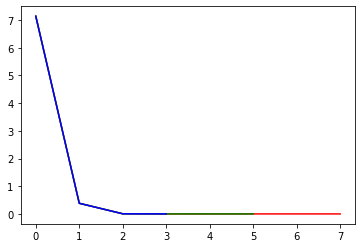





Gauss-Seidel METHOD:
[ 2.61666667 -2.7197619   7.00710476]
[ 2.99314825 -2.41407911  7.00192397]
[ 3.00299229 -2.41416051  7.00162702]
[ 3.00296978 -2.41417356  7.00162744]
[ 3.00296938 -2.41417355  7.00162745]
[ 3.00296938 -2.41417355  7.00162745]
tol=1e-9: solution=array([ 3.00296938, -2.41417355,  7.00162745]), iterations=6
[ 2.61666667 -2.7197619   7.00710476]
[ 2.99314825 -2.41407911  7.00192397]
[ 3.00299229 -2.41416051  7.00162702]
[ 3.00296978 -2.41417356  7.00162744]
tol=1e-6: solution=array([ 3.00296938, -2.41417355,  7.00162745]), iterations=4
[ 2.61666667 -2.7197619   7.00710476]
[ 2.99314825 -2.41407911  7.00192397]
[ 3.00299229 -2.41416051  7.00162702]
tol=1e-3: solution=array([ 3.00296978, -2.41417356,  7.00162744]), iterations=3


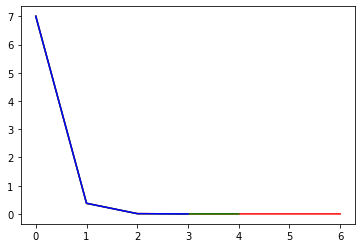

In [3]:

#Usage 
A = np.array([  [3, -.1, -.2],
                [-.1, 7, -.3],
                [.3, -.2, 10]])

b = np.array([7.85, -19.3, 71.4])
x0 = np.zeros_like(b, dtype = 'float')
max_iterations = 100

#Jacobi Method
print(f"JACOBI METHOD:")
              
solution, iterations, error = jacobi(A, b, x0, 1e-9, max_iterations = max_iterations)
print(f"tol=1e-9: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'r')
        
solution, iterations, error = jacobi(A, b, x0, 1e-6, max_iterations = max_iterations)
print(f"tol=1e-6: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'g')
        
solution, iterations, error = jacobi(A, b, x0, 1e-3, max_iterations = max_iterations)
print(f"tol=1e-3: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'b')
        
plt.show()

print("\n\n\n")


#Gauss-Seidel Method
print(f"Gauss-Seidel METHOD:")
              
solution, iterations, error = gauss_seidel(A, b, x0, 1e-9 , max_iterations)
print(f"tol=1e-9: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'r')
              
solution, iterations, error = gauss_seidel(A, b, x0, 1e-6 , max_iterations)
print(f"tol=1e-6: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'g')
              
solution, iterations, error = gauss_seidel(A, b, x0, 1e-3 , max_iterations)
print(f"tol=1e-3: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'b')

plt.show()



In [4]:
# As the tolerance decreases, the number of iterations
# needed to converge increases, also reducing the error

#Gauss-Seidel required fewer iterations (7) to converge compared to Jacobi (9) 
#As you decrease tolerance, the # of iterations increases
#However both methods converged b/c materix is diagonally dominant.
